In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd
# Obtendo o diretório atual do Jupyter Notebook
caminho_script = "\\".join(os.getcwd().split("\\")[:-1])
print("Caminho do diretório atual:", caminho_script)
# Adicionando o diretório ao sys.path se precisar importar módulos
sys.path.append(caminho_script)

from classes.dados.dados import DataHandler as dh
from classes.dados.GaussianData import GausianDataHandler as gdh
from classes.dados.monteCarlo import MonteCarlo as MC
from classes.modelos.GausianCov import GaussianCovModel as GCM
from classes.modelos.GausianTrad import GausianTraditionalModel as GTM
from classes.modelos.GausianGreg import GausianGredModel as GGM
from classes.modelos.GausFriedman import GausianFriedman as GFM
from classes.modelos.MQOtradicional import MQOT
from classes.modelos.GausNaiveBay import GausNaiveBay as GNB

Caminho do diretório atual: c:\Users\henri\Documents\pythonProjcs\cadeira_IA_cirilo\av2\Classificacao


In [2]:
# plotar dados para cada classe
dados = dh("EMGsDataset.csv").dados

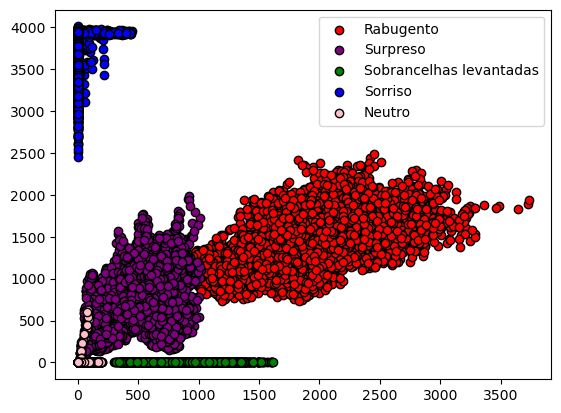

In [3]:
# classe 1
plt.scatter(dados[dados[:,2] == 5, 0], dados[dados[:,2] == 5, 1], color = "r", edgecolors="k", label='Rabugento')
plt.scatter(dados[dados[:,2] == 4, 0], dados[dados[:,2] == 4, 1], color = "purple", edgecolors="k", label='Surpreso')
plt.scatter(dados[dados[:,2] == 3, 0], dados[dados[:,2] == 3, 1], color = "green", edgecolors="k", label='Sobrancelhas levantadas')
plt.scatter(dados[dados[:,2] == 2, 0], dados[dados[:,2] == 2, 1], color = "blue", edgecolors="k", label='Sorriso')
plt.scatter(dados[dados[:,2] == 1, 0], dados[dados[:,2] == 1, 1], color = "pink", edgecolors="k", label = "Neutro")
plt.legend()
plt.show()

In [2]:
gausianData = gdh("EMGsDataset.csv")
x, y = gausianData.x, gausianData.y

x, y = x.T, y.T
# separar dados
x_treino, y_treino, x_test, y_test = MC.partition(x, y)
x_treino, y_treino, x_test, y_test = x_treino.T, y_treino.T, x_test.T, y_test.T

In [13]:

print(x_treino)
print(y_treino)

[[2238. 1297.    0. ...  176. 2130. 2182.]
 [1535.    0. 3926. ...  690. 1468. 1570.]]
[[5. 3. 2. ... 4. 5. 5.]]


In [5]:
print(y_test[0])

[2. 4. 4. ... 4. 1. 3.]


In [6]:
# para mqo tradicional os dados devem estar em outra formatação
gausianData.setMatrizes()
gausianData.returnYasMatrix()
x, y = gausianData.x, gausianData.matY
# separa dados
x_treino, y_treino, x_test, y_test = MC.partition(x, y)

In [7]:
# MQO tradcional
model_MQOT = MQOT(x_treino, y_treino)
model_MQOT.trainModel()

In [8]:
print(model_MQOT.predict(x_test))

[[-1.49282668 -1.20024228 -0.46916782 -0.83774258  0.99997935]
 [-0.62236912 -0.68806528 -0.56627235 -0.60376566 -0.51952759]
 [-0.40908396 -0.75630719 -0.51255742 -0.53709318 -0.78495825]
 ...
 [-0.95888499  0.93204986 -1.25609848 -0.78188874 -0.93517764]
 [-1.07420977 -0.90601019 -0.53503725 -0.72752992  0.24278713]
 [-0.37232435 -0.74873128 -0.51103588 -0.52653464 -0.84137385]]
[5 5 1 ... 2 5 1]


In [3]:
model = GTM(x_treino, y_treino, np.array([1,2,3,4,5]))
model.getStatistcs()

In [8]:
model_gnb = GNB(x_treino, y_treino, np.array([1,2,3,4,5]))
model_gnb.getStatistcs()

In [9]:
model_conv = GCM(x_treino, y_treino, np.array([1,2,3,4,5]))
model_conv.getStatistcs()

In [10]:
model_greg = GGM(x_treino, y_treino, np.array([1,2,3,4,5]))
model_greg.getStatistcs()

In [11]:
model_fri = GFM(x_treino, y_treino, np.array([1,2,3,4,5]), 0.7)
model_fri.getStatistcs()

In [12]:
predicao = model_fri.predict(x_test)
print(predicao)
media_acerto = predicao - y_test[0]
media_acerto = len(media_acerto[media_acerto == 0])/ len(y_test[0])
print(media_acerto)

[3, 2, 2, 5, 4, 2, 1, 1, 1, 4, 1, 4, 4, 1, 4, 4, 4, 3, 3, 3, 4, 4, 1, 1, 3, 4, 4, 2, 3, 2, 3, 3, 5, 3, 2, 5, 3, 3, 3, 2, 4, 2, 4, 5, 4, 1, 5, 1, 4, 4, 2, 1, 3, 3, 4, 3, 4, 3, 5, 2, 1, 2, 1, 2, 3, 2, 2, 1, 4, 2, 1, 2, 5, 2, 1, 1, 1, 4, 4, 1, 5, 3, 3, 2, 5, 2, 2, 2, 5, 5, 5, 3, 3, 2, 1, 3, 2, 4, 1, 4, 2, 5, 4, 3, 4, 2, 3, 1, 3, 2, 5, 2, 2, 2, 4, 3, 4, 4, 2, 5, 4, 2, 1, 4, 2, 2, 1, 4, 1, 2, 4, 4, 5, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 4, 4, 1, 2, 1, 5, 1, 2, 5, 2, 3, 2, 4, 5, 1, 4, 4, 3, 2, 2, 3, 3, 5, 5, 4, 2, 3, 3, 1, 4, 2, 3, 2, 2, 5, 1, 5, 1, 5, 3, 1, 2, 3, 1, 2, 4, 3, 4, 4, 5, 5, 1, 4, 4, 1, 5, 3, 2, 2, 4, 2, 1, 3, 1, 5, 5, 4, 2, 4, 4, 4, 3, 1, 2, 4, 5, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 2, 5, 3, 4, 4, 1, 4, 1, 2, 2, 4, 2, 5, 2, 5, 5, 2, 3, 5, 4, 5, 1, 2, 5, 3, 3, 2, 3, 2, 5, 4, 4, 1, 2, 1, 3, 4, 1, 2, 2, 5, 5, 4, 5, 4, 1, 2, 5, 1, 2, 4, 3, 3, 1, 4, 1, 2, 2, 5, 1, 4, 5, 1, 5, 5, 5, 3, 1, 5, 3, 4, 2, 2, 5, 2, 3, 1, 4, 3, 5, 1, 4, 3, 5, 1, 5, 1, 2, 1, 1, 5, 3, 3, 4, 5, 5, 3, 4, 4, 4, 2, 4, 1, 4, 

In [13]:
predicao = model_greg.predict(x_test)
print(predicao)
media_acerto = predicao - y_test[0]
media_acerto = len(media_acerto[media_acerto == 0])/ len(y_test[0])
print(media_acerto)

[3, 2, 2, 5, 4, 2, 1, 1, 1, 4, 1, 3, 4, 1, 4, 4, 4, 3, 3, 3, 4, 4, 1, 1, 3, 4, 4, 2, 3, 2, 3, 3, 5, 3, 2, 5, 3, 3, 3, 2, 4, 2, 4, 5, 4, 1, 5, 1, 4, 4, 2, 1, 3, 3, 4, 3, 4, 3, 5, 2, 1, 2, 1, 2, 3, 2, 2, 1, 4, 2, 1, 2, 5, 2, 1, 1, 1, 4, 4, 1, 5, 3, 3, 2, 5, 2, 2, 2, 5, 5, 5, 3, 3, 2, 1, 3, 2, 4, 1, 4, 2, 5, 4, 3, 4, 2, 3, 1, 3, 2, 5, 2, 2, 2, 4, 3, 4, 4, 2, 5, 4, 2, 1, 4, 2, 2, 1, 4, 1, 2, 4, 4, 5, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 4, 4, 1, 2, 1, 5, 1, 2, 5, 2, 3, 2, 4, 5, 1, 4, 4, 3, 2, 2, 3, 3, 5, 5, 4, 2, 3, 3, 1, 4, 2, 3, 2, 2, 5, 1, 5, 1, 5, 3, 1, 2, 3, 1, 2, 4, 3, 4, 4, 5, 5, 1, 4, 4, 1, 5, 3, 2, 2, 4, 2, 1, 3, 1, 5, 5, 4, 2, 4, 4, 4, 3, 1, 2, 4, 5, 2, 1, 3, 3, 2, 1, 1, 1, 1, 2, 2, 5, 3, 4, 4, 1, 4, 1, 2, 2, 4, 2, 5, 2, 5, 5, 2, 3, 5, 4, 5, 1, 2, 5, 3, 3, 2, 3, 2, 5, 4, 4, 1, 2, 1, 3, 4, 1, 2, 2, 5, 5, 4, 5, 4, 1, 2, 5, 1, 2, 4, 3, 3, 1, 4, 1, 2, 2, 5, 1, 4, 5, 1, 5, 5, 5, 3, 1, 5, 3, 4, 2, 2, 5, 2, 3, 1, 4, 3, 5, 1, 4, 3, 5, 1, 5, 1, 2, 1, 1, 5, 3, 3, 4, 5, 5, 3, 4, 4, 4, 2, 4, 1, 4, 

In [14]:
predicao = model_conv.predict(x_test)
print(predicao)
media_acerto = predicao - y_test[0]
media_acerto = len(media_acerto[media_acerto == 0])/ len(y_test[0])
print(media_acerto)

[3, 2, 2, 5, 4, 2, 1, 1, 1, 4, 1, 4, 4, 1, 4, 4, 4, 3, 3, 3, 4, 4, 1, 1, 3, 4, 4, 2, 3, 2, 3, 3, 5, 3, 2, 5, 3, 3, 3, 2, 1, 2, 4, 5, 4, 1, 5, 1, 4, 4, 2, 1, 3, 3, 4, 3, 4, 3, 5, 2, 1, 2, 1, 2, 3, 2, 2, 1, 4, 2, 1, 2, 5, 2, 1, 1, 1, 1, 4, 1, 5, 3, 3, 2, 5, 2, 2, 2, 5, 5, 5, 3, 3, 2, 1, 3, 2, 4, 1, 4, 2, 5, 4, 3, 4, 2, 3, 1, 3, 2, 5, 2, 2, 2, 4, 3, 4, 3, 2, 5, 4, 2, 1, 4, 2, 2, 1, 4, 1, 2, 4, 4, 5, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 4, 4, 1, 2, 1, 5, 1, 2, 5, 2, 3, 2, 4, 5, 1, 4, 3, 3, 2, 2, 3, 3, 5, 5, 4, 2, 3, 3, 1, 4, 2, 3, 2, 2, 5, 1, 5, 1, 5, 3, 1, 2, 3, 1, 2, 4, 3, 4, 4, 5, 5, 1, 4, 4, 1, 5, 3, 2, 2, 4, 2, 1, 3, 4, 5, 5, 4, 2, 4, 4, 4, 3, 1, 2, 4, 5, 2, 1, 3, 4, 2, 1, 4, 4, 1, 2, 2, 5, 3, 4, 4, 1, 4, 1, 2, 2, 4, 2, 5, 2, 5, 5, 2, 3, 5, 4, 5, 1, 2, 5, 3, 3, 2, 3, 2, 5, 4, 4, 4, 2, 1, 3, 4, 1, 2, 2, 5, 5, 4, 5, 4, 1, 2, 5, 1, 2, 4, 3, 3, 1, 3, 1, 2, 2, 3, 1, 4, 5, 1, 5, 5, 5, 3, 1, 5, 3, 4, 2, 2, 5, 2, 3, 1, 4, 3, 5, 1, 4, 3, 5, 1, 5, 1, 2, 1, 1, 5, 3, 3, 4, 5, 5, 3, 4, 4, 4, 2, 4, 1, 4, 

In [4]:

predicao = model.predict(x_test)
media_acerto = predicao- y_test.flatten()
print(predicao)
media_acerto = len(media_acerto[media_acerto == 0])/ len(y_test[0])
print(media_acerto)

[2, 3, 5, 5, 5, 3, 3, 2, 2, 3, 2, 5, 2, 4, 4, 5, 2, 3, 5, 1, 5, 2, 5, 4, 4, 2, 4, 3, 5, 2, 5, 5, 3, 5, 2, 3, 3, 1, 3, 2, 1, 1, 2, 5, 5, 5, 3, 1, 2, 4, 5, 3, 4, 4, 5, 1, 4, 2, 4, 4, 3, 3, 2, 3, 4, 1, 5, 3, 5, 3, 1, 3, 3, 5, 3, 1, 1, 5, 1, 5, 4, 3, 5, 2, 3, 1, 5, 2, 5, 4, 3, 4, 5, 1, 1, 3, 5, 5, 3, 4, 2, 5, 1, 5, 2, 3, 2, 4, 5, 1, 5, 5, 2, 5, 5, 3, 5, 5, 3, 5, 5, 1, 3, 2, 5, 2, 1, 4, 4, 1, 4, 1, 5, 4, 1, 2, 5, 4, 4, 4, 1, 3, 1, 4, 1, 1, 1, 1, 4, 2, 5, 4, 1, 2, 2, 4, 2, 1, 2, 4, 2, 1, 2, 3, 4, 5, 2, 4, 3, 4, 3, 5, 5, 4, 2, 5, 5, 4, 4, 4, 5, 1, 2, 1, 1, 3, 1, 3, 3, 3, 5, 4, 3, 1, 3, 2, 1, 3, 1, 1, 5, 2, 1, 5, 2, 5, 5, 4, 3, 3, 5, 4, 5, 5, 2, 3, 2, 4, 4, 1, 1, 3, 2, 5, 5, 2, 5, 4, 1, 2, 4, 1, 1, 5, 4, 2, 4, 5, 5, 4, 3, 4, 3, 1, 3, 1, 3, 5, 2, 4, 2, 1, 2, 5, 2, 1, 2, 5, 3, 1, 1, 2, 2, 3, 1, 3, 1, 4, 3, 1, 2, 3, 3, 4, 2, 1, 4, 3, 2, 4, 3, 5, 5, 5, 5, 3, 5, 1, 3, 3, 4, 1, 4, 5, 2, 2, 5, 2, 3, 3, 4, 5, 4, 2, 5, 3, 3, 1, 5, 3, 4, 4, 4, 2, 4, 1, 1, 2, 1, 2, 4, 5, 5, 1, 3, 5, 4, 5, 4, 4, 2, 1, 3, 

In [16]:
predicao = model_gnb.predict(x_test)
print(predicao)
media_acerto = predicao - y_test[0]
media_acerto = len(media_acerto[media_acerto == 0])/ len(y_test[0])
print(media_acerto)

[3, 2, 2, 5, 4, 2, 1, 1, 1, 4, 1, 4, 4, 1, 4, 4, 4, 3, 3, 4, 4, 4, 1, 1, 3, 4, 4, 2, 3, 2, 3, 3, 5, 3, 2, 5, 3, 3, 3, 2, 1, 2, 4, 5, 4, 1, 5, 1, 4, 4, 2, 1, 3, 3, 4, 3, 4, 3, 5, 2, 1, 2, 1, 2, 3, 2, 2, 1, 4, 2, 1, 2, 5, 2, 1, 1, 1, 1, 4, 1, 5, 3, 3, 2, 5, 2, 2, 2, 5, 5, 5, 3, 3, 2, 1, 3, 2, 4, 1, 4, 2, 5, 4, 3, 4, 2, 3, 1, 3, 2, 5, 2, 2, 2, 4, 3, 4, 3, 2, 5, 4, 2, 1, 4, 2, 2, 1, 4, 1, 2, 4, 4, 5, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 4, 4, 1, 2, 1, 5, 1, 2, 5, 2, 3, 2, 4, 5, 1, 4, 3, 3, 2, 2, 3, 3, 5, 5, 4, 2, 3, 3, 1, 4, 2, 3, 2, 2, 5, 1, 5, 1, 5, 3, 1, 2, 3, 1, 2, 4, 3, 4, 4, 5, 5, 1, 4, 4, 1, 5, 3, 2, 2, 4, 2, 1, 3, 4, 5, 5, 4, 2, 4, 4, 4, 3, 1, 2, 4, 5, 2, 1, 3, 4, 2, 1, 4, 4, 1, 2, 2, 5, 3, 4, 4, 1, 4, 1, 2, 2, 4, 2, 5, 2, 5, 5, 2, 3, 5, 4, 5, 1, 2, 5, 3, 3, 2, 3, 2, 5, 4, 4, 4, 2, 1, 3, 4, 1, 2, 2, 5, 5, 4, 5, 4, 1, 2, 5, 1, 2, 4, 3, 3, 1, 3, 1, 2, 2, 3, 1, 4, 5, 1, 5, 5, 5, 3, 1, 5, 3, 4, 2, 2, 5, 2, 3, 1, 4, 3, 5, 1, 4, 3, 5, 1, 5, 1, 2, 1, 1, 5, 3, 3, 4, 5, 5, 3, 4, 4, 4, 2, 4, 1, 4, 